In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/flipkart_product.csv",encoding='unicode_escape')
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [3]:
df = df.assign(Id=range(len(df)))

In [4]:
df.shape

(189874, 6)

In [5]:
print(df.isnull().sum())

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
Id              0
dtype: int64


In [6]:
#drop the null values
df =df.dropna()

In [7]:
print(df.isnull().sum())

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
Id             0
dtype: int64


In [8]:
df.head()

,ProductName,Price,Rate,Review,Summary,Id
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...,0
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling,1
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...,2
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan,3
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189857 entries, 0 to 189872
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189857 non-null  object
 1   Price        189857 non-null  object
 2   Rate         189857 non-null  object
 3   Review       189857 non-null  object
 4   Summary      189857 non-null  object
 5   Id           189857 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 10.1+ MB


In [10]:
import string,re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
def clean_text(text):
  text = word_tokenize(text)#create tokens
  text =" ".join(text)#join tokens
  text =[char for char in text if char not in string.punctuation]#remove punctuation
  text =''.join(text)#join letters
  text =[word for word in text.split() if word.lower() not in stopwords.words('english')]#remove commen english words
  return " ".join(text)

In [13]:
df['Summary']=df['Summary'].apply(clean_text)

In [14]:
df.head()


,ProductName,Price,Rate,Review,Summary,Id
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler excellent air flow price amazing ...,0
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler Nice cooling,1
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,quality good power air decent,2
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,bad product fan,3
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product,4


In [15]:
def process(text):
  text =re.sub('[^a-zA-Z0-9]',' ',text)
  text =re.sub('\s+',' ',text)
  return text

In [16]:
#preprocessing the data
df['Review']=df['Review'].apply(lambda x: process(x))
df['ProductName']=df['ProductName'].apply(lambda x: process(x))
df['Summary']=df['Summary'].apply(lambda x: process(x))
df.head()

,ProductName,Price,Rate,Review,Summary,Id
0,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",5,Super,Great cooler excellent air flow price amazing ...,0
1,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",5,Awesome,Best budget 2 fit cooler Nice cooling,1
2,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",3,Fair,quality good power air decent,2
3,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",1,Useless product,bad product fan,3
4,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",3,Fair,Ok ok product,4


In [17]:
df.drop(['Price'],axis=1)

,ProductName,Rate,Review,Summary,Id
0,Candes 12 L Room Personal Air Cooler White Bla...,5,Super,Great cooler excellent air flow price amazing ...,0
1,Candes 12 L Room Personal Air Cooler White Bla...,5,Awesome,Best budget 2 fit cooler Nice cooling,1
2,Candes 12 L Room Personal Air Cooler White Bla...,3,Fair,quality good power air decent,2
3,Candes 12 L Room Personal Air Cooler White Bla...,1,Useless product,bad product fan,3
4,Candes 12 L Room Personal Air Cooler White Bla...,3,Fair,Ok ok product,4
...,...,...,...,...,...
189868,NIVEA Soft Light Moisturizer for Face Hand Bod...,5,Terrific,Good,189868
189869,NIVEA Soft Light Moisturizer for Face Hand Bod...,5,Terrific,Thanks,189869
189870,NIVEA Soft Light Moisturizer for Face Hand Bod...,5,Terrific,Good,189870
189871,NIVEA Soft Light Moisturizer for Face Hand Bod...,5,Just wow,Super,189871


In [18]:
df = df.drop(df[df['Review'] == 'Nan'].index)

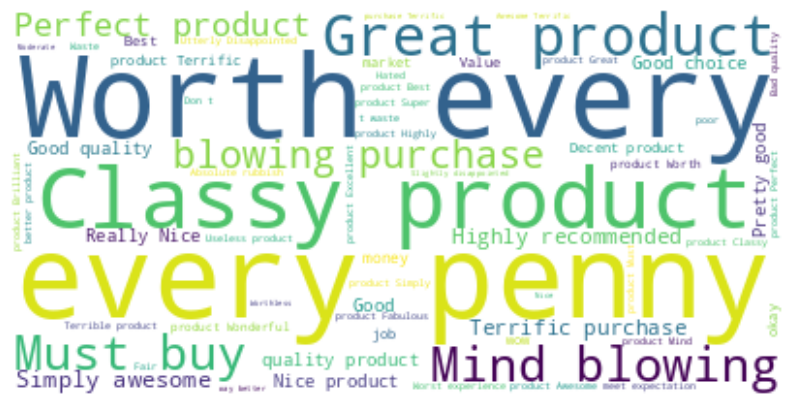

In [19]:
import matplotlib.pyplot as plt
#use a word cloud to visualize the most used words in the reviews column:
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white").generate(text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
eg = ' '.join(df['Review'].unique().tolist())

In [21]:
print(eg)

Super  Awesome Fair Useless product Highly recommended Nice Unsatisfactory Worth the money Great product Mind blowing purchase Brilliant Classy product Must buy  Fabulous  Worth every penny Just wow  Terrific purchase Excellent Terrific Simply awesome Wonderful Expected a better product Good quality product Decent product Very satisfactory Waste of money  Good not best Does the job Pretty good Good cooler Worthless Worst experience ever  Perfect product  Nice product Like an assembled one can get for 4 5K Cheap Quality Not good Very Good Slightly disappointed Horrible Very poor Really Nice Best in the market  Absolute rubbish  Just okay Bad quality Delightful Value for money Good choice Hated it  Good Terrible product Not recommended at all Did not meet expectations Badly disappointed Utterly Disappointed Moderate BEST PRODUCT AND BEST BUY Don t waste your money Product is Good but Huge in size Could be way better Must buy Cool product Worth the money Desert Cooler live up to the Name 

In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
print(sia.polarity_scores(eg))

{'neg': 0.117, 'neu': 0.444, 'pos': 0.439, 'compound': 1.0}


In [56]:
from tqdm.notebook import tqdm
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/169005 [00:00<?, ?it/s]

In [25]:
df['Positive']=[sia.polarity_scores(i)["pos"] for i in df["Review"]]
df['Negative']=[sia.polarity_scores(i)["neg"] for i in df['Review']]
df['Neutral']=[sia.polarity_scores(i)["neu"] for i in df['Review']]

df2 = df[["Review","Positive","Negative","Neutral"]]

In [26]:
df2.head()

,Review,Positive,Negative,Neutral
0,Super,1.0,0.000,0.000
1,Awesome,1.0,0.000,0.000
2,Fair,1.0,0.000,0.000
3,Useless product,0.0,0.737,0.263
4,Fair,1.0,0.000,0.000


<Axes: >

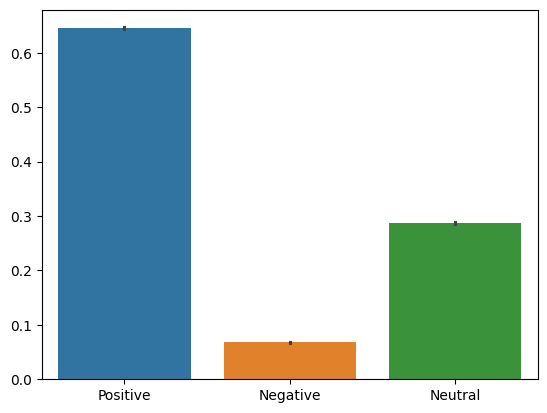

In [27]:
#Visualize the data to understand the overall sentiment trends.
import seaborn as sns
sns.barplot(data=df2)

In [28]:
df.head()

,ProductName,Price,Rate,Review,Summary,Id,Positive,Negative,Neutral
0,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",5,Super,Great cooler excellent air flow price amazing ...,0,1.0,0.000,0.000
1,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",5,Awesome,Best budget 2 fit cooler Nice cooling,1,1.0,0.000,0.000
2,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",3,Fair,quality good power air decent,2,1.0,0.000,0.000
3,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",1,Useless product,bad product fan,3,0.0,0.737,0.263
4,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",3,Fair,Ok ok product,4,1.0,0.000,0.000


In [29]:
from textblob import TextBlob

In [30]:
def genarate_polarity(text):
  sentiment = TextBlob(text).sentiment
  return sentiment

In [31]:
# Apply the function to processed data
sentiment = df['Review'].apply(genarate_polarity)
sentiment = sentiment.to_frame()
sentiment.head()

,Review
0,"(0.3333333333333333, 0.6666666666666666)"
1,"(1.0, 1.0)"
2,"(0.7, 0.9)"
3,"(-0.5, 0.2)"
4,"(0.7, 0.9)"


In [32]:
sentiment['polarity'] = sentiment['Review'].apply(lambda x:x[0])

In [33]:
#add polarity in dataframe
df['Polarity']= sentiment['polarity']

In [34]:
df.head()

,ProductName,Price,Rate,Review,Summary,Id,Positive,Negative,Neutral,Polarity
0,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",5,Super,Great cooler excellent air flow price amazing ...,0,1.0,0.000,0.000,0.333333
1,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",5,Awesome,Best budget 2 fit cooler Nice cooling,1,1.0,0.000,0.000,1.000000
2,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",3,Fair,quality good power air decent,2,1.0,0.000,0.000,0.700000
3,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",1,Useless product,bad product fan,3,0.0,0.737,0.263,-0.500000
4,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",3,Fair,Ok ok product,4,1.0,0.000,0.000,0.700000


In [35]:
df['polarity'] = ['positive' if x > 0 else 'negative' if x < 0 else 'neutral' for x in df['Polarity']]
df.head()

,ProductName,Price,Rate,Review,Summary,Id,Positive,Negative,Neutral,Polarity,polarity
0,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",5,Super,Great cooler excellent air flow price amazing ...,0,1.0,0.000,0.000,0.333333,positive
1,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",5,Awesome,Best budget 2 fit cooler Nice cooling,1,1.0,0.000,0.000,1.000000,positive
2,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",3,Fair,quality good power air decent,2,1.0,0.000,0.000,0.700000,positive
3,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",1,Useless product,bad product fan,3,0.0,0.737,0.263,-0.500000,negative
4,Candes 12 L Room Personal Air Cooler White Bla...,"??3,999",3,Fair,Ok ok product,4,1.0,0.000,0.000,0.700000,positive


In [36]:
df.drop(['Polarity','Price'],axis=1)

,ProductName,Rate,Review,Summary,Id,Positive,Negative,Neutral,polarity
0,Candes 12 L Room Personal Air Cooler White Bla...,5,Super,Great cooler excellent air flow price amazing ...,0,1.000,0.000,0.000,positive
1,Candes 12 L Room Personal Air Cooler White Bla...,5,Awesome,Best budget 2 fit cooler Nice cooling,1,1.000,0.000,0.000,positive
2,Candes 12 L Room Personal Air Cooler White Bla...,3,Fair,quality good power air decent,2,1.000,0.000,0.000,positive
3,Candes 12 L Room Personal Air Cooler White Bla...,1,Useless product,bad product fan,3,0.000,0.737,0.263,negative
4,Candes 12 L Room Personal Air Cooler White Bla...,3,Fair,Ok ok product,4,1.000,0.000,0.000,positive
...,...,...,...,...,...,...,...,...,...
189868,NIVEA Soft Light Moisturizer for Face Hand Bod...,5,Terrific,Good,189868,1.000,0.000,0.000,neutral
189869,NIVEA Soft Light Moisturizer for Face Hand Bod...,5,Terrific,Thanks,189869,1.000,0.000,0.000,neutral
189870,NIVEA Soft Light Moisturizer for Face Hand Bod...,5,Terrific,Good,189870,1.000,0.000,0.000,neutral
189871,NIVEA Soft Light Moisturizer for Face Hand Bod...,5,Just wow,Super,189871,0.792,0.000,0.208,positive


In [37]:
x = df.Review

In [38]:
y = df.polarity

In [39]:
#train the data
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=46)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
#tf-idf vectectorizer
vectorizer = TfidfVectorizer(max_features=1000)
x_train_idf = vectorizer.fit_transform(x_train)
x_test_idf= vectorizer.transform(x_test)

In [43]:
# Print idf values
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names_out(),columns=["idf_weights"])
# Sort ascending
df_idf.sort_values(by=['idf_weights'],ascending = False).head()

,idf_weights
10,12.1214
old,12.1214
nova,12.1214
number,12.1214
nyc,12.1214


In [44]:
## Perform Multinomial Naive Bayes Classification
mnb = MultinomialNB()
mnb.fit(x_train_idf, y_train)

MultinomialNB()

In [45]:
# Predict polarity by fitting the model to testing data
pred_mnb = mnb.predict(x_test_idf)

# Calculate accuracy of predicted values
acc = accuracy_score(y_test, pred_mnb)
print(acc)

0.9978698855063459


In [46]:
# Perform Random Forest classification on the processed data and compare the accuracy score of both these models

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train_idf, y_train)

# Predict using testing data
y_pred_rf = clf_rf.predict(x_test_idf)

# Calculate accuracy
acc2 = accuracy_score(y_test, y_pred_rf)
print(acc2)

0.998994112600219


In [49]:
#svm
from sklearn.svm import SVC
clf = SVC().fit(x_train_idf,y_train)
pred_clf= clf.predict(x_test_idf)
acc3= accuracy_score(y_test,pred_clf)
print(acc3)

0.9986686784414662


In [51]:
lr = LogisticRegression().fit(x_train_idf,y_train)
pred_lr=lr.predict(x_test_idf)
acc4=accuracy_score(y_test,pred_lr)
print(acc4)

0.9984911689003284


In [53]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00


In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Sample text
text = input('Enter the review')

# Analyze sentiment intensity
sentiment_score = analyzer.polarity_scores(text)

# Print the sentiment scores
print("Sentiment Scores:", sentiment_score)

# Determine overall sentiment based on compound score
if sentiment_score['compound'] >= 0.05:
    print("Overall Sentiment: Positive")
elif sentiment_score['compound'] <= -0.05:
    print("Overall Sentiment: Negative")
else:
    print("Overall Sentiment: Neutral")


Enter the reviewbad
Sentiment Scores: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}
Overall Sentiment: Negative
